In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(42)

# Create fake x-data
x = np.arange(10)
# Create fake y-data
a = 4.5
b = 0.5
c = 20
y = a * np.exp(-b * x) + c 
y = y + np.random.normal(loc=0, scale=0.3, size=len(x))  # Add noise

In [3]:
def plot_sc(x,y):
    fig, ax = plt.subplots()
    ax.scatter(x, y, c="green")
    ax.set_xlabel("X")
    ax.set_ylabel("y")
    #ax.legend()
    plt.show()

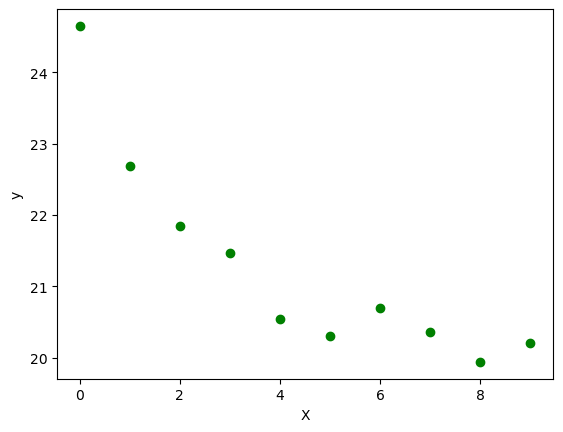

In [4]:
plot_sc(x,y)

### Method 1: polyfit 
This method only works when $c=0$, *i.e* when you want to fit a curve with equation $y=a e^{bx} $ to your data.

The `polyfit()` command from Numpy is used to fit a polynomial function to data. This might seem a little strange: why are we trying to fit a polynomial function to the data when we want to fit an exponential function? The answer is that we can convert an exponential function into a polynomial one using the fact that:

$$y= ae^{b x} \implies \ln (y) = \ln (a)+ bx$$
 

because we can take the natural logarithm of both sides. This creates a linear equation $f(x)=mx+c$ where:

* $f(x)=\ln (y)$
* $m=b$
* $c=\ln (a)$

So `polyfit()` can be used to fit $\ln (y)$ against $x$.
:

In [5]:
# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(6354)

# Create fake x-data
x1 = np.arange(10)
# Create fake y-data
a = 4.5
b = 0.5
c = 0  #set c=0
y1 = a * np.exp(b * x) 
y1 = y1 + np.random.normal(loc=0, scale=10, size=len(x))  # Add noise

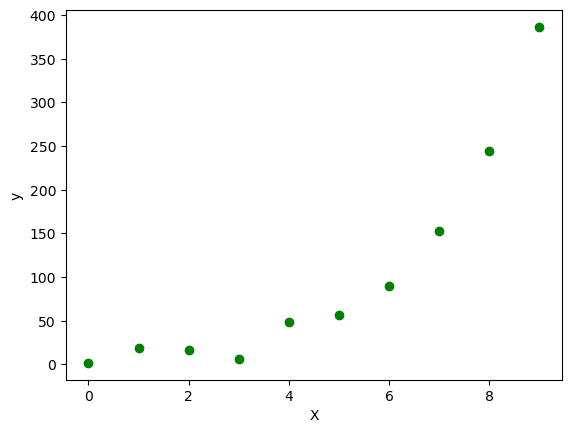

In [6]:
plot_sc(x1,y1)

In [7]:
# Fit a polynomial of degree 1 (a linear function) to the data
p = np.polyfit(x1, np.log(y1), 1)

In [8]:
# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x1_fit = np.linspace(np.min(x1), np.max(x1), 100)
y1_fit = a*np.exp(b * x1_fit)

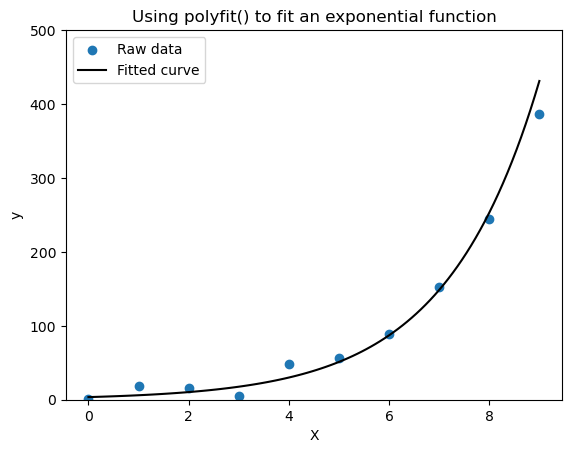

In [9]:
ax = plt.axes()
ax.scatter(x1, y1, label='Raw data')
ax.plot(x1_fit, y1_fit, 'k', label='Fitted curve')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y')
ax.set_ylim(0, 500)
ax.set_xlabel('X')
ax.legend()

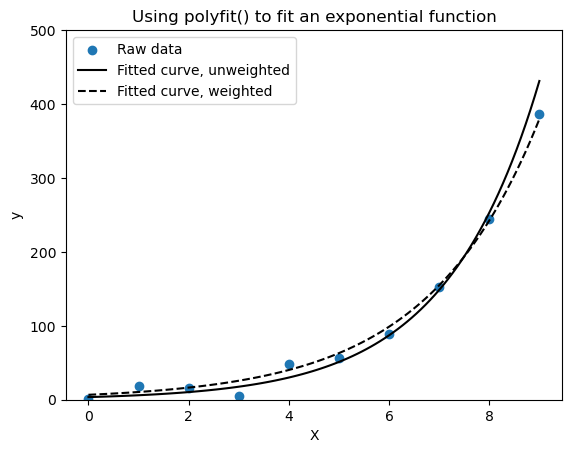

In [10]:
# Fit a weighted polynomial of degree 1 (a linear function) to the data
p = np.polyfit(x1, np.log(y1), 1, w=np.sqrt(y1))

# Convert the polynomial back into an exponential
a = np.exp(p[1])
b = p[0]
x1_fit_wt = np.linspace(np.min(x1), np.max(x1), 100)
y1_fit_wt = a * np.exp(b * x1_fit_wt)

# Plot
ax = plt.axes()
ax.scatter(x1, y1, label='Raw data')
ax.plot(x1_fit, y1_fit, 'k', label='Fitted curve, unweighted')
ax.plot(x1_fit_wt, y1_fit_wt, 'k--', label='Fitted curve, weighted')
ax.set_title('Using polyfit() to fit an exponential function')
ax.set_ylabel('y')
ax.set_ylim(0, 500)
ax.set_xlabel('X')
ax.legend()

### Method 2: Curve Fit

From the `Scipy` pacakge we can get the `curve_fit()` function. This is more general than `polyfit()` (we can fit any type of function we like, exponential or not) but it’s more complicated in that we sometimes need to provide an initial guess as to what the constants could be in order for it to work.

Let’s use our original example data (with $c\neq 0$):

In [11]:
# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(6354)

# Create fake x-data
x2 = np.arange(10)
# Create fake y-data
a = 4.5
b = 0.5
c = 50  
y2 = a * np.exp(b * x) + c
y2 = y2 + np.random.normal(loc=0, scale=10, size=len(x))  # Add noise

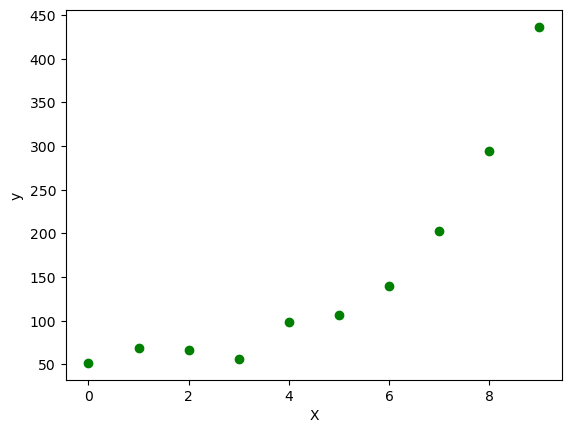

In [12]:
plot_sc(x2,y2)

In [13]:
# Have an initial guess as to what the values of the parameters are
a0 = 5
b0 = 0.6
c0 = 40

In [14]:
from scipy.optimize import curve_fit

# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x2, y2, p0=(a0,b0,c0), maxfev=5000)

The first output, `popt`, is a list of the optimised values for the parameters which, in our case, are the constants $a$, $b$, and $c$.

In [15]:
# Create the fitted curve
x2_fit = np.linspace(np.min(x2), np.max(x2), 100)
y2_fit = popt[0] * np.exp(popt[1] * x2_fit) + popt[2]

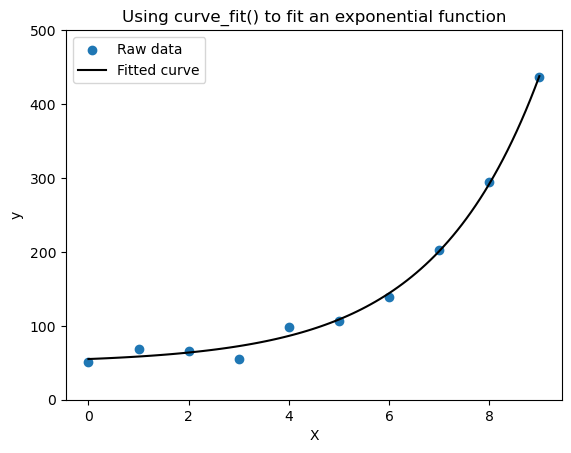

In [16]:
ax = plt.axes()
ax.scatter(x2, y2, label='Raw data')
ax.plot(x2_fit, y2_fit, 'k', label='Fitted curve')
ax.set_title('Using curve_fit() to fit an exponential function')
ax.set_ylabel('y')
ax.set_ylim(0, 500)
ax.set_xlabel('X')
ax.legend()

In [17]:
print(popt)

[ 5.61694056  0.47065639 49.4411667 ]


### Negative Exponential

In [18]:
# Set a seed for the random number generator so we get the same random numbers each time
np.random.seed(64)

# Create fake x-data
x3 = np.arange(10)
# Create fake y-data
a = 4.5
b = - 0.5
c = 10
y3 = a * np.exp(b * x) + c
y3 = y3 + np.random.normal(loc=0, scale=0.1, size=len(x3))  # Add noise

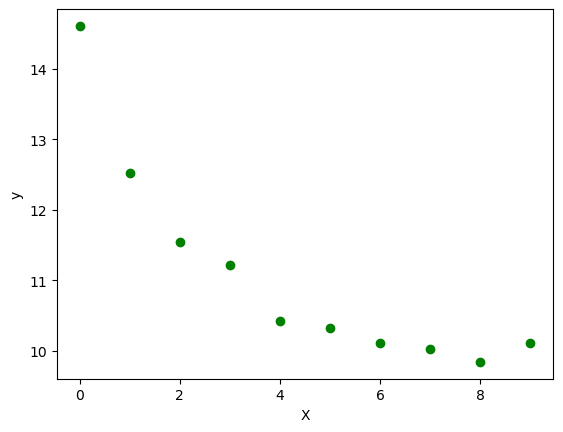

In [19]:
plot_sc(x3,y3)

In [20]:
# Have an initial guess as to what the values of the parameters are
a0 = 5
b0 = - 0.6
c0 = 12

In [21]:
# Fit the function a * np.exp(b * t) + c to x and y
popt, pcov = curve_fit(lambda t, a, b, c: a * np.exp(b * t) + c, x3, y3, p0=(a0,b0,c0), maxfev=5000)

In [22]:
# Create the fitted curve
x3_fit = np.linspace(np.min(x3), np.max(x3), 100)
y3_fit = popt[0] * np.exp(popt[1] * x3_fit) + popt[2]

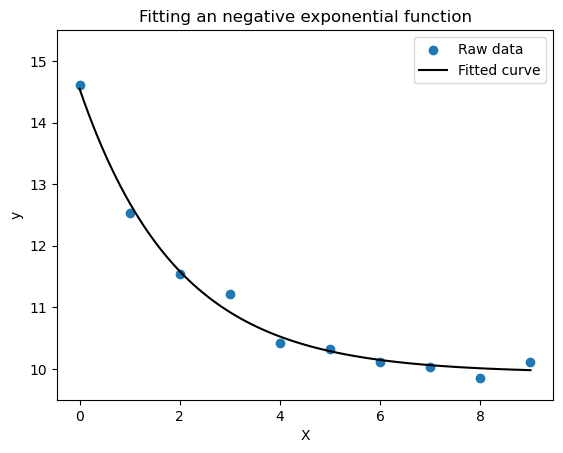

In [23]:
ax = plt.axes()
ax.scatter(x3, y3, label='Raw data')
ax.plot(x3_fit, y3_fit, 'k', label='Fitted curve')
ax.set_title('Fitting an negative exponential function')
ax.set_ylabel('y')
ax.set_ylim(9.5, 15.5)
ax.set_xlabel('X')
ax.legend()

In [24]:
popt

array([ 4.61213449, -0.51390159,  9.93482531])

In [38]:
def func(x,a,b,c):
    return a * np.exp(b * x) + c

In [39]:
from lmfit import Model

model = Model(func)

In [40]:
model.independent_vars

['x']

In [41]:
model.param_names

['a', 'b', 'c']

In [43]:
params = model.make_params(a=5.0, b=-0.6, c=12)
result = model.fit(y3, params, x=x3)

In [45]:
print(result.fit_report())

[[Model]]
    Model(func)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 10
    # variables        = 3
    chi-square         = 0.18507117
    reduced chi-square = 0.02643874
    Akaike info crit   = -33.8959993
    Bayesian info crit = -32.9882440
    R-squared          = 0.99087764
[[Variables]]
    a:  4.61213449 +/- 0.16727145 (3.63%) (init = 5)
    b: -0.51390159 +/- 0.04640069 (9.03%) (init = -0.6)
    c:  9.93482531 +/- 0.10075731 (1.01%) (init = 12)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -0.756
    C(a, c) = -0.419


# Example

In [67]:
y4 = np.array([146., 94., 79.,62., 41.])
x4 = np.array([375, 470, 528, 625,880])

In [68]:
def fun(x, alpha1, alpha2, A, B):
    return A*x**(-alpha1)

In [139]:
uncertainty = abs(0.16 + np.random.normal(size=x.size, scale=0.05))
uncertainty 

array([0.1425119 , 0.14877824, 0.17911711, 0.28022882, 0.22037617,
       0.15391842, 0.21906871, 0.1496724 , 0.12313192, 0.0671334 ])

In [74]:
from lmfit import minimize, Parameters

def residual(params, x, data):
    alpha1 = params['alpha1']
    A = params['A']

    
    model = A*x**(-alpha1)
    
    return (data-model)

In [75]:
params = Parameters()
params.add('alpha1', value=1.0, min=0.8, max=10.0)

params.add('A', value=100.0, min=100.0, max=1.0e10)

In [76]:
out = minimize(residual, params, args=(x4, y4))

In [77]:
out.params

name,value,standard error,relative error,initial value,min,max,vary
alpha1,1.63712568,0.11310518,(6.91%),1.0,0.80000000,10.0000000,True
A,2337195.53,1615112.12,(69.10%),100.0,100.000000,1.0000e+10,True


In [154]:
x4_fit = np.linspace(np.min(x4), np.max(x4), 100)
y4_fit = 15423.092*x4_fit**(-1.40000000) + 1.0000e+29*x4_fit**(-13.0000000)

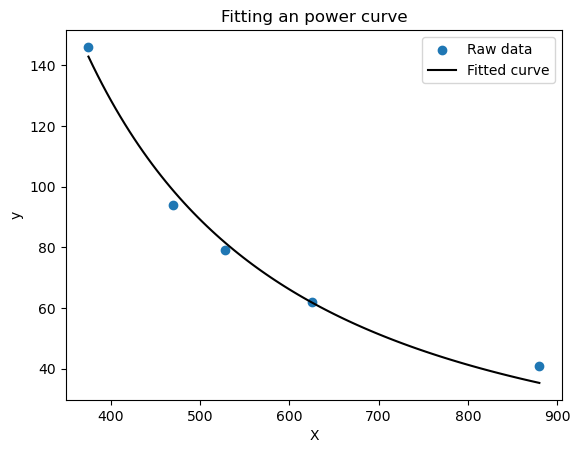

In [73]:
ax = plt.axes()
ax.scatter(x4, y4, label='Raw data')
ax.plot(x4_fit, y4_fit, 'k', label='Fitted curve')
ax.set_title('Fitting an power curve')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend()

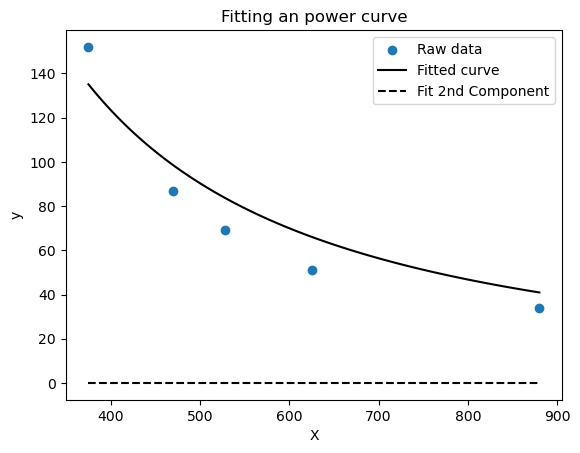

In [149]:

y4_B = 1.0000e+10*x4_fit**(-10.0000000)

ax = plt.axes()
ax.scatter(x4, y4, label='Raw data')
ax.plot(x4_fit, y4_fit, 'k', label='Fitted curve')
ax.plot(x4_fit, y4_B, 'k--', label='Fit 2nd Component')
ax.set_title('Fitting an power curve')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend()

In [46]:
y4 = np.array([146., 94., 79.,62., 41.])
x4 = np.array([375., 470., 528., 625.,880.])

from scipy.optimize import differential_evolution

def func(parameters, *data):

    #we have 3 parameters which will be passed as parameters and
    #"experimental" x,y which will be passed as data

    a1,a2,A1,A2 = parameters
    x,y = data

    result = 0

    for i in range(len(x)):
        result += (A1*x[i]**(-a1) + A2*x[i]**(-a2) - y[i])**2

    return result**0.5

In [53]:
bounds = [(0.8, 1.4), (1.5,15.0), (1000.0, 1.0e10), (1000.0, 1.0e30)]


#packing "experimental" data into args
args = (x4,y4)

result = differential_evolution(func, bounds, args=args)

result.x

array([1.31273710e+00, 1.10183557e+01, 2.94773523e+05, 5.26103727e+29])

In [64]:
def func1(parameters, *data):

    #we have 3 parameters which will be passed as parameters and
    #"experimental" x,y which will be passed as data

    a1,A1= parameters
    x,y = data

    result = 0

    for i in range(len(x)):
        result += (A1*x[i]**(-a1) -y4[i])**2

    return result

In [65]:
bounds = [(0.5, 10), (100.0, 1.0e10)]


#packing "experimental" data into args
args = (x4,y4)

result = differential_evolution(func1, bounds, args=args)

result.x

array([1.63811145e+00, 2.35132161e+06])

In [215]:
alpha1 = [optimizer(bounds)[0] for i in range(20)]
alpha2 = [optimizer(bounds)[1] for i in range(20)]

In [197]:
min(alpha2), max(alpha2)

(9.535082061145479, 10.459958361335863)

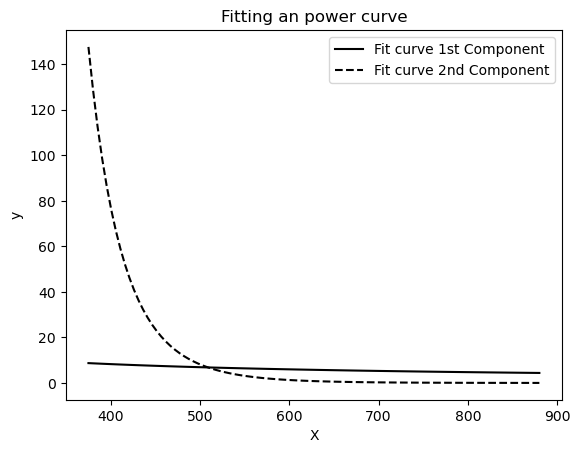

In [52]:
x4_fit = np.linspace(np.min(x4), np.max(x4), 100)

alpha1 = result.x[0]
alpha2 = result.x[1]
A = result.x[2]
B = result.x[3]

y4_A = A*x4_fit**(-alpha1)
y4_B = B*x4_fit**(-alpha2)

ax = plt.axes()
# ax.scatter(x4, y4, label='Raw data')
ax.plot(x4_fit, y4_A, 'k', label='Fit curve 1st Component')
ax.plot(x4_fit, y4_B, 'k--', label='Fit curve 2nd Component')
ax.set_title('Fitting an power curve')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend()

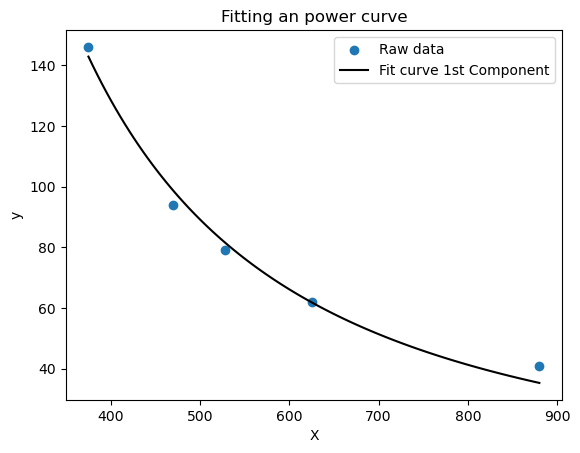

In [66]:
y4_fit = result.x[1]*x4_fit**(-result.x[0])

ax = plt.axes()
ax.scatter(x4, y4, label='Raw data')
ax.plot(x4_fit, y4_fit, 'k', label='Fit curve 1st Component')
#ax.plot(x4_fit, y4_B, 'k--', label='Fit curve 2nd Component')
ax.set_title('Fitting an power curve')
ax.set_ylabel('y')
ax.set_xlabel('X')
ax.legend()